In [7]:
import librosa
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data, sr = librosa.load("./classifier/training/data/vowel/vowel_32.wav")

In [26]:
FRAME_SIZE = 512
stft = np.abs(librosa.stft(data, n_fft=FRAME_SIZE))

#just gonna plot that first horizontal bar of the spectrogram
first_frame = stft[:,0]

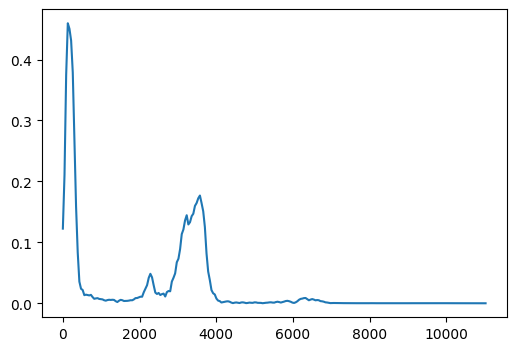

In [12]:
#get the x axis 
frequencies = librosa.fft_frequencies(sr=sr, n_fft=FRAME_SIZE)

plt.figure(figsize=(6, 4))
plt.plot(frequencies, first_frame)

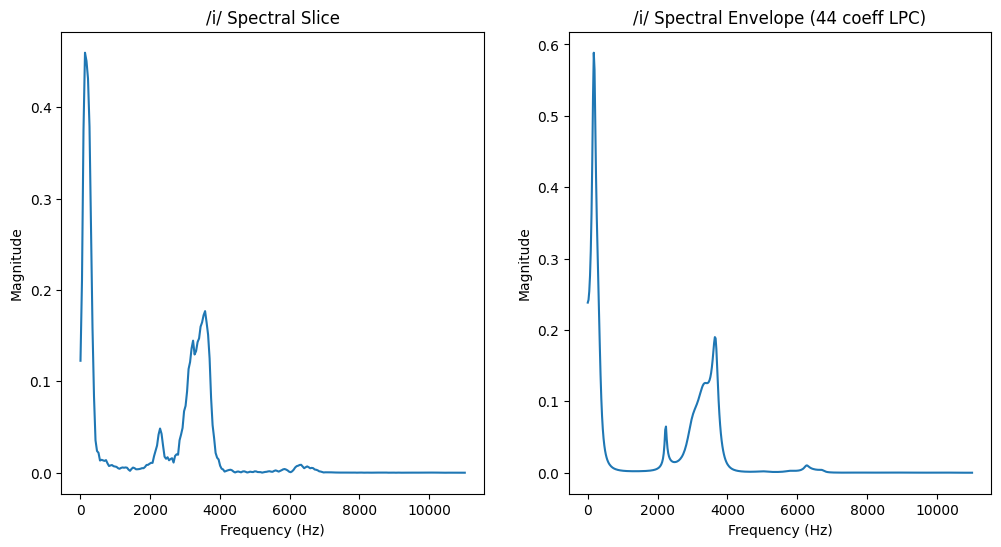

In [87]:
NUM_COEFFS = 44
frame_lpc_coefficients = librosa.lpc(data[:FRAME_SIZE], order=NUM_COEFFS)
freqs, h = scipy.signal.freqz( 1.0 , frame_lpc_coefficients, worN=FRAME_SIZE)
envelope = np.abs(h)
freqs_hz = freqs * sr / (2 * np.pi)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('/i/ Spectral Slice')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude')
ax1.plot(frequencies, first_frame, label="Spectral Slice")

#have to adjust the decimal to get them to line up
ax2.set_title(f'/i/ Spectral Envelope ({NUM_COEFFS} coeff LPC)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.plot(freqs_hz, envelope * 0.0018, label="Spectral Envelope (LPC)")

plt.show()

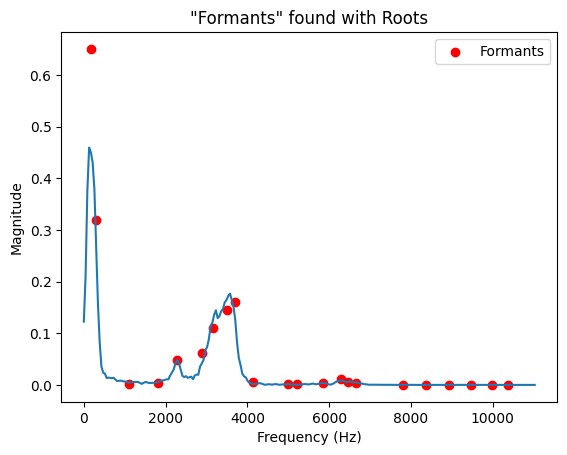

In [88]:
lpc_coefficients = librosa.lpc(data, order=44)
roots = np.roots(lpc_coefficients)
roots = [r for r in roots if np.imag(r) >= 0]

# Formants given in angular frequency
ang_freq = np.angle(roots)

# Angular frequency -> Hz
formants = sorted(ang_freq * (sr / (2 * np.pi)))

#plot the frame
plt.plot(frequencies, first_frame)

#I have no idea how to align the dots with the spectral slice
plt.scatter(formants, [np.interp(f, freqs_hz, envelope * 0.002) for f in formants], color='r', marker='o', label='Formants')

plt.title('"Formants" found with Roots')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(False)
plt.show()

In [55]:
len(first_frame)

257